In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.3  # previous pdf hatch linewidth
print(mpl.matplotlib_fname())
from feature_selection import *
from dataExtractor import *
%matplotlib inline

/home/users/u5584091/anaconda3/lib/python3.5/site-packages/matplotlib/mpl-data/matplotlibrc


Using Theano backend.


In [18]:
patients = restorePatientsWalk()
patients = filterTalkAndWalkAvailable(patients)
if type(patients) is dict:
    patients = list(patients.values())
patbk = patients

In [23]:
patbk2 = patbk
print(len(patbk))
patients = [p for p in patbk2 if p['age']>=34]
total = len(patients)
withPD = len([pat for pat in patients if pat["isPD"]])
withPDnoSpeech = len([pat for pat in patients if (pat["isPD"] and (not pat["hasSpeechDisorder"]))])
print(total, withPD, withPDnoSpeech)

1379
775 389 35


60.5726290516
43.7796257796
[[  0   0   0 293 266 213 167 114 101  85  65  51  39  34  15]
 [  0   0   0   6  13  20  38  44  65 102 135 127 126  97  60]]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


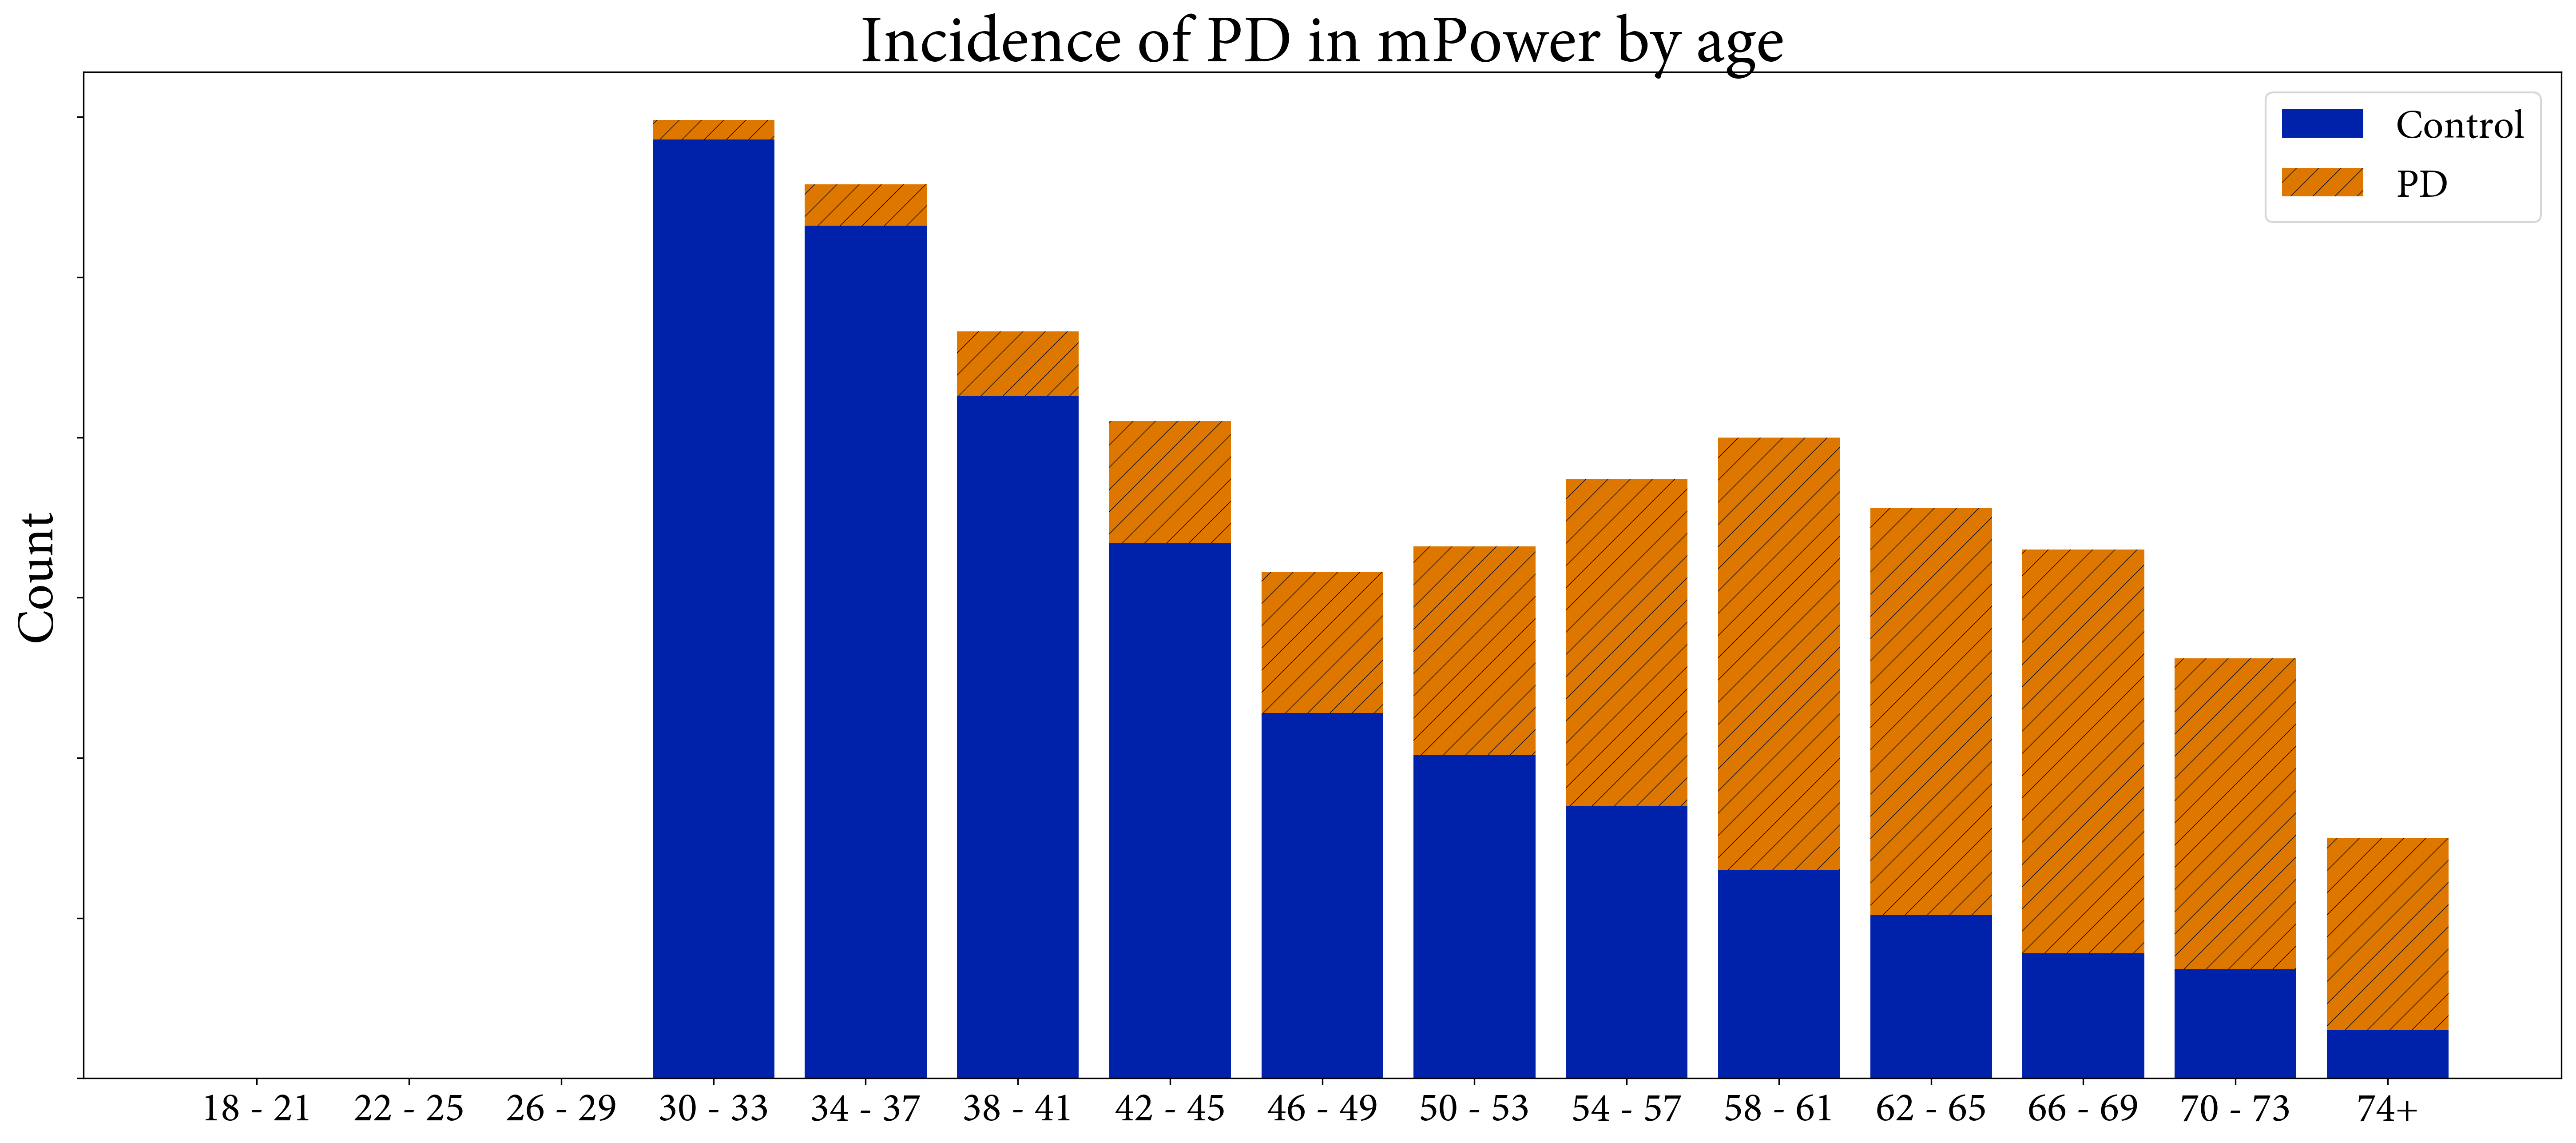

In [4]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='./MINIONPRO-REGULAR.OTF', size=36)
prop2 = fm.FontProperties(fname='./MINIONPRO-REGULAR.OTF', size=28)
prop3 = fm.FontProperties(fname='./MINIONPRO-REGULAR.OTF', size=22)
prop4 = fm.FontProperties(fname='./MINIONPRO-REGULAR.OTF', size=16)
hfont = {'fontproperties': prop}
lfont = {'fontproperties': prop2}
leg = {'prop': prop3}
tfont = {'fontproperties': prop3}
stfont = {'fontproperties': prop4}
agePD = np.mean([pat["age"] for pat in patients if pat["isPD"]])
ageNoPD = np.mean([pat["age"] for pat in patients if not pat["isPD"]])

print(agePD)
print(ageNoPD)

fig= plt.figure(figsize=(24,10), dpi=300, facecolor='w', edgecolor='k')                                                     
ax = fig.add_subplot(1,1,1) 

raceidx = {'"South Asian"': 0, '"White or Caucasian"': 1, '"Mixed"': 2, '"Middle Eastern"': 3, '"East Asian"': 4, '"Latino/Hispanic"': 5, '"Black or African"': 6, '"Caribbean"': 7, '"Native American"': 8, '"Other"': 9, '"Pacific Islander"': 10}
age = [pat["age"] for pat in patients]
gender = [pat["gender"] for pat in patients]
isPD = [pat["isPD"] for pat in patients]

age = [[0, 0] for _ in range(15)] 
for pat in patients:
    age[min(int(pat["age"]-18)//4, 14)][pat["isPD"]] += 1

data = np.array(age).T

# ax1.scatter([a for a, pd in zip(age, isPD) if pd], [g for g, pd in zip(gender, isPD) if pd], s=20, alpha=0.1, c='r', label="PD")

# ax1.scatter([a for a, pd in zip(age, isPD) if not pd], [g for g, pd in zip(gender, isPD) if not pd], s=20, alpha=0.1, c='b', label="PD")
        
    
# people = ('A','B','C','D','E','F','G','H')
segments = 2

# generate some multi-dimensional data & arbitrary labels
# data = 3 + 10* np.random.rand(segments, len(people))
# percentages = (np.random.randint(5,20, (len(people), segments)))
y_pos_label = [str(a * 4 + 18) + " - " + str(str(a * 4 + 21)) for a in range(data.shape[1])]
y_pos_label[-1] = "74+"
y_pos = np.arange(data.shape[1])
print(data)

colors =["#0022aa", "#dd7700"]
hatches=["", "//"]
patch_handles = []
left = np.zeros(data.shape[1]) # left alignment of data starts at zero
print(left)
for i, d in enumerate(data):
    patch_handles.append(ax.bar(y_pos, d, 
      color=colors[i%len(colors)], align='center',
      hatch=hatches[i%len(hatches)],
      bottom=left))
    # accumulate the left-hand offsets
    left += d

# go through all of the bar segments and annotate
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
#         ax.text(x,y, "%d%%" % (percentages[i,j]), ha='center')

ax.set_xticklabels(y_pos_label, **tfont)
ax.set_yticklabels(ax.get_yticklabels(), **tfont)
ax.set_xticks(y_pos)
# ax.set_yticklabels(people)
ax.set_ylabel('Count', **lfont) 
ax.set_title("Incidence of PD in mPower by age", **hfont)
plt.legend(["Control", "PD"], **leg)
plt.show()

1880
MALE NO PD:    -1.0076435339e-08 0.0236875403736 0.0357574608507 0.0474187394015 0.159290631261
FEMALE NO PD:  -1.00421326101e-08 0.0237075471676 0.0353848692682 0.046163774368 0.157610459837
MALE IS PD:    -1.00602711485e-08 0.0265384891203 0.0412533158916 0.0561463881168 0.155116002735
FEMALE IS PD:  -1.00020005219e-08 0.0317455038881 0.0443765383087 0.0574567248587 0.230129554309
MALE SPECIAL:  -1.00381084345e-08 0.0248117770049 0.0436305046228 0.0564500360918 0.0983732319349
FEMALE SPECIAL: 0.000766651932501 0.0371885458231 0.0452305002727 0.0568428173646 0.0980300041555


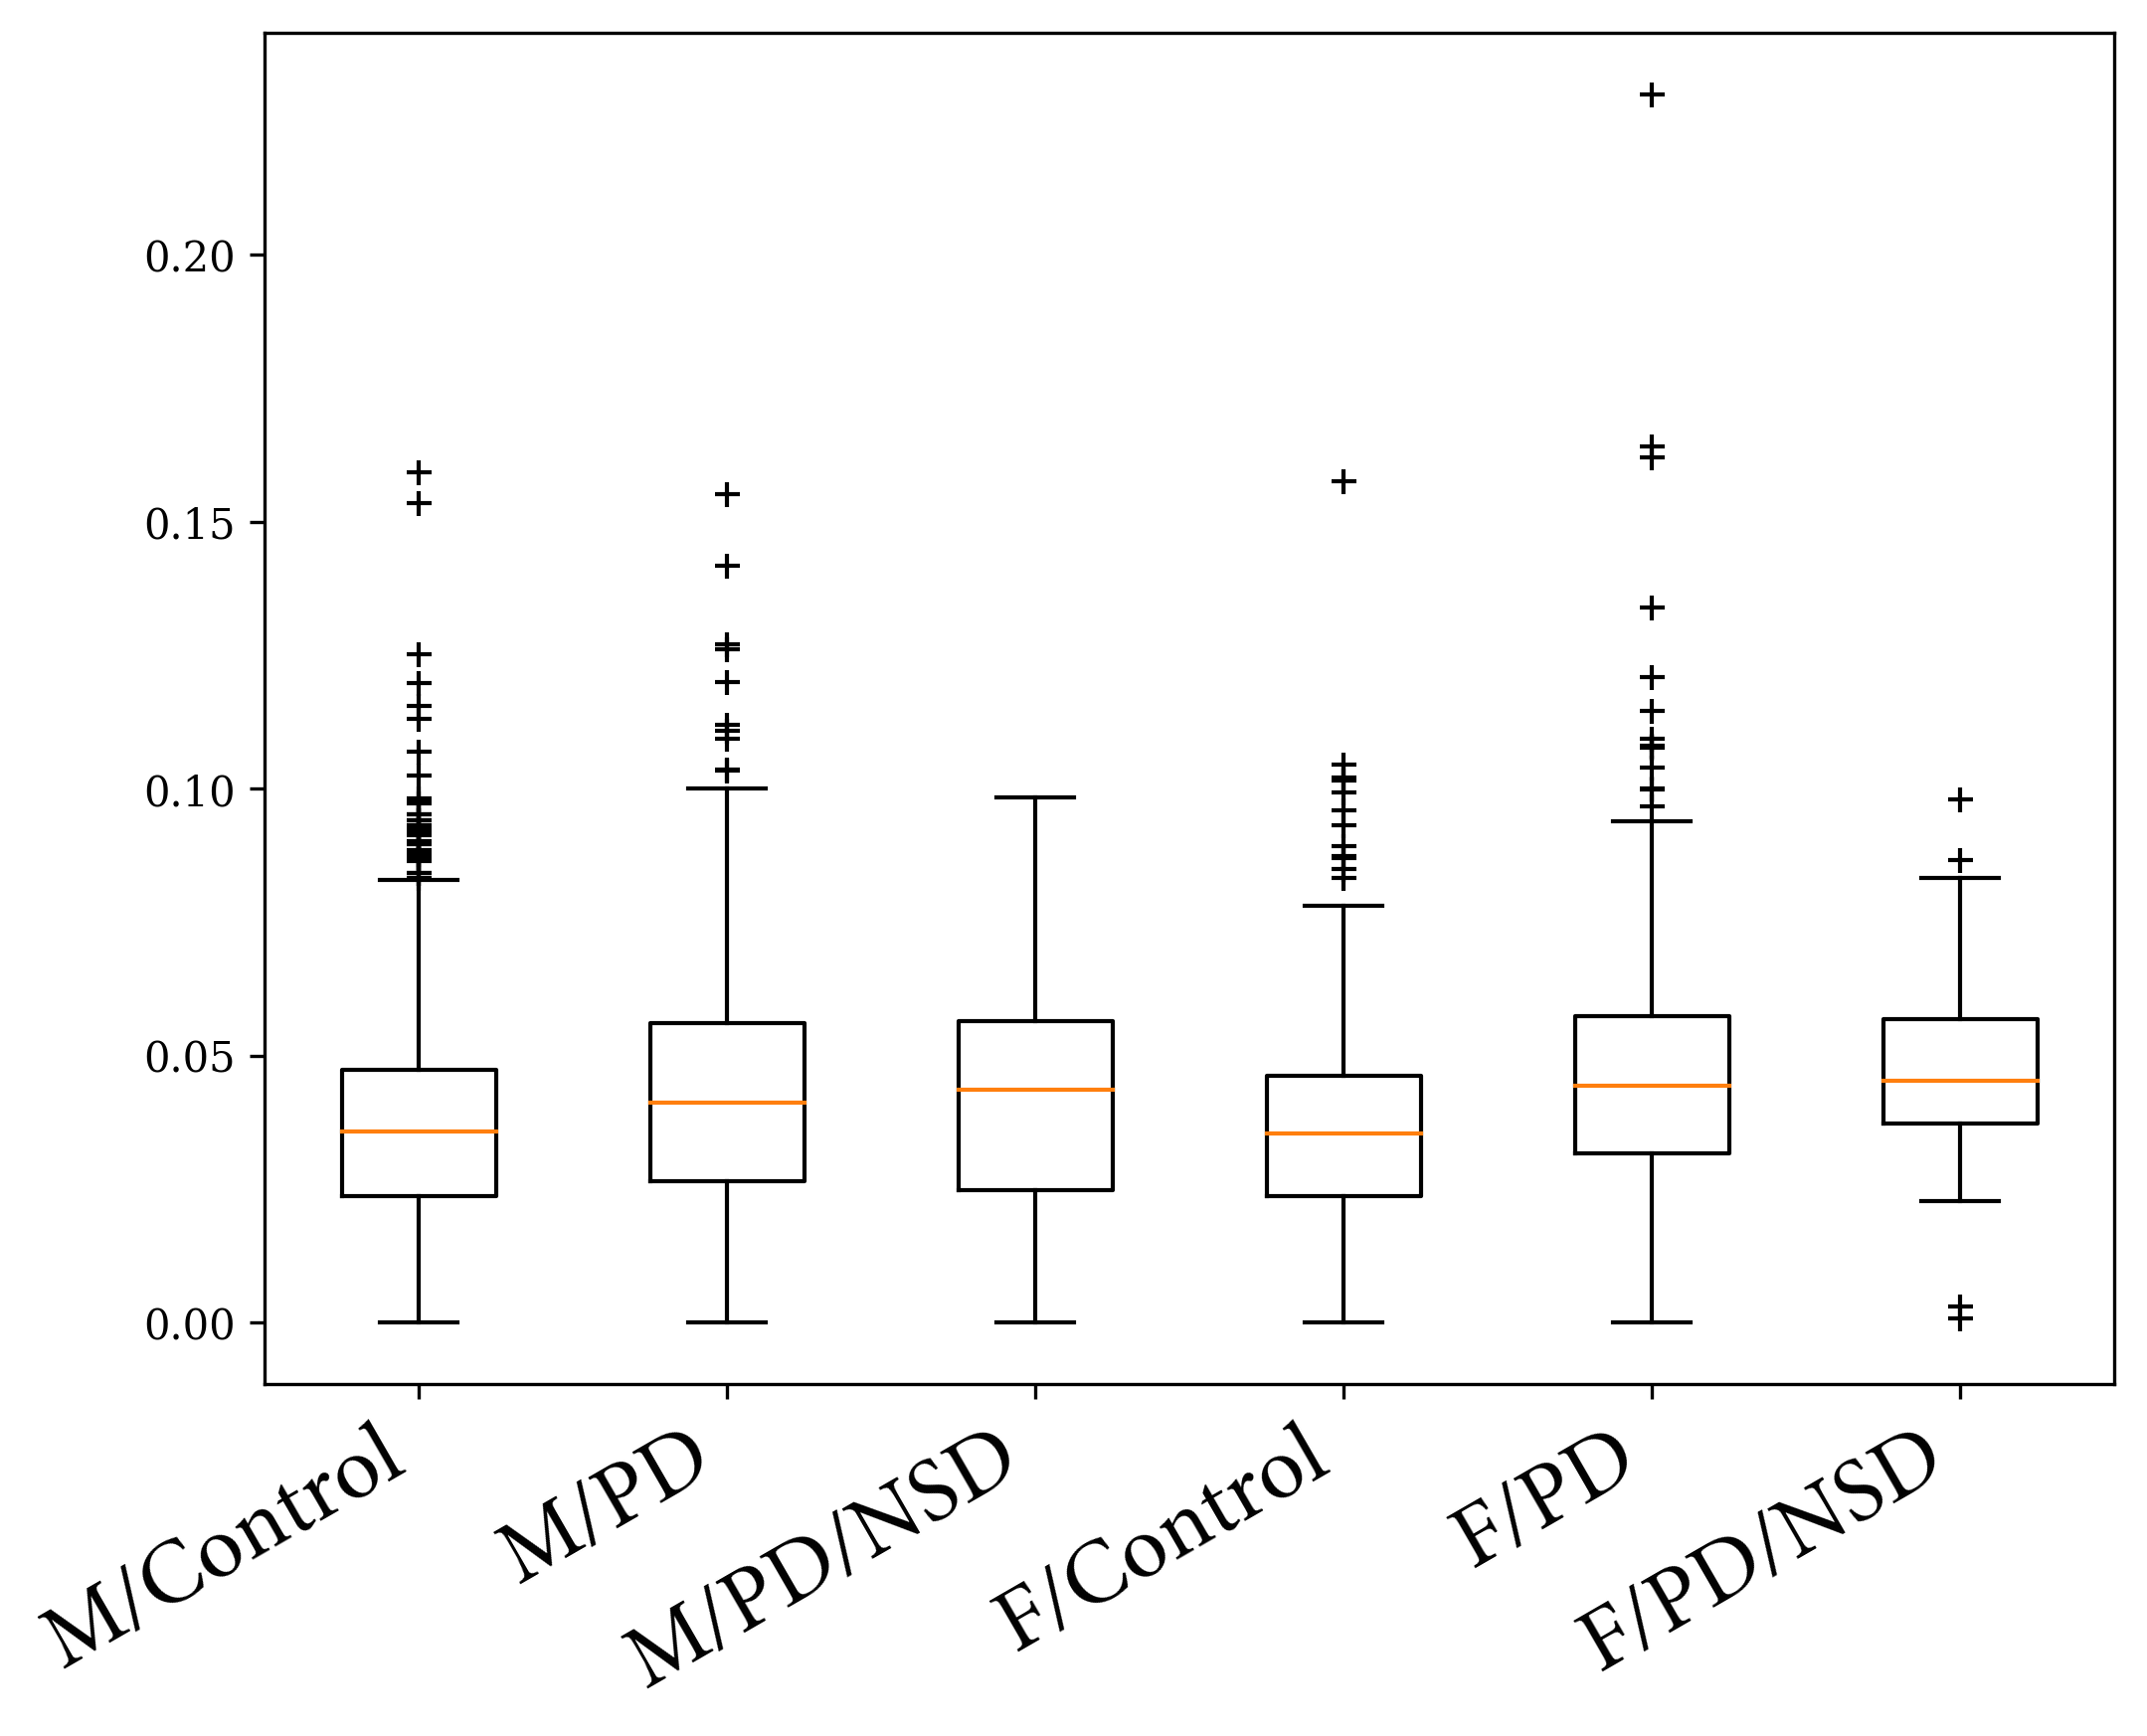

In [5]:
from numpy.random import rand

def plot_age_feature_scatter(feature, fname="feature", count = lambda f: True):
    female = [pat for pat in patients if pat["gender"] == 0 ]
    male= [pat for pat in patients if pat["gender"] == 1 ]
    fispd = []
    fnopd = []
    mispd = []
    mnopd = []
    fspec = []
    mspec = []
    ct = 0
    for pat in female[:-1]:
#         print(pat)
#         ft = np.std(pat["f0"])
#         ft = talk_all_features(pat)[0][talk_all_features_names().index(feature)]
        ft = speech_dynamic(pat)[0][feature]
        age = pat['age']
#         age = talk_all_features(pat)[0][talk_all_features_names().index("DFA")]

#         age = speech_dynamic(pat)[0][18]
#         age = talk_all_features(pat)[0][talk_all_features_names().index("mean_MFCC_11th coef")]
#         age = talk_all_features(pat)[0][talk_all_features_names().index("PPE")]
#         best = getBestWalk(pat['walks'])
#         rest = best['rest_features']
#         bp_rest = best['bp_rest_features']
#         walk = best['walk_features']
#         pedo = best['pedo']
        
#         ft = np.mean([walk['dynamic'][26]])
        
        if pat["isPD"]:
            if not pat["hasSpeechDisorder"]:
                fspec.append((ft,age+rand()))
            else:
                fispd.append((ft,age + rand()))
        else:
            fnopd.append((ft,age + rand()))
        if count(ft):
            ct+= 1
        
    for pat in male[:-1]:
#         ft = np.std(pat["f0"])
#         ft = talk_all_features(pat)[0][talk_all_features_names().index(feature)]
        age = pat['age']
#         age = talk_all_features(pat)[0][talk_all_features_names().index("DFA")]
#         age = talk_all_features(pat)[0][talk_all_features_names().index("mean_MFCC_11th coef")]
        ft = speech_dynamic(pat)[0][feature]
#         age = speech_dynamic(pat)[0][18]
#         best = getBestWalk(pat['walks'])
#         rest = best['rest_features']
#         bp_rest = best['bp_rest_features']
#         walk = best['walk_features']
#         pedo = best['pedo']
        
#         ft = np.mean([walk['dynamic'][26]])
        
        if pat["isPD"]:
            if not pat["hasSpeechDisorder"]:
                mspec.append((ft,age+rand()))
            else:
                mispd.append((ft,age + rand()))
        else:
            mnopd.append((ft,age + rand()))
        if count(ft):
            ct+= 1
    
    print(ct)
#     fig= plt.figure(figsize=(12,8), dpi=300, facecolor='w', edgecolor='k')                                                     
#     ax = fig.add_subplot(1,1,1)
#     ax.set_xlabel("Age with gaussian noise σ = 1", **lfont)
#     ax.set_xlabel("Mean of 11th MFCC", **lfont)
    
#     ax.set_ylabel(fname, **lfont)
#     ax.set_xlim([0.55,2.3])
#     ax.set_xlim([17, 80])
#     plt.scatter([x[1] for x in mnopd], [x[0] for x in mnopd], color='#0044a2', s=5, alpha=1, label="Male Control")
#     plt.scatter([x[1] for x in fnopd], [x[0] for x in fnopd], color='#56b4e9', s=5, marker="^", alpha=1, label="Female Control")
#     plt.scatter([x[1] for x in fispd], [x[0] for x in fispd], color='#d55e00', s=15,  marker='x', alpha=1, label="Female PD")
#     plt.scatter([x[1] for x in mispd], [x[0] for x in mispd], color='#880000', s=24,  marker='+', alpha=1, label="Male PD")
#     plt.scatter([x[1] for x in mspec], [x[0] for x in mspec], color='#EE0000', s=240,  marker='*',edgecolor='white', alpha=1, label="Male PD No Speech Difficulty")
#     plt.scatter([x[1] for x in fspec], [x[0] for x in fspec], color='#FF8e00', s=240,  marker='*', edgecolor='white',alpha=1, label="Female PD No Speech Difficulty")
    
    
    mnopd = [x[0] for x in mnopd]
    print("MALE NO PD:   ", np.min(mnopd), np.percentile(mnopd, 25), np.median(mnopd), np.percentile(mnopd, 75), np.max(mnopd))
    fnopd = [x[0] for x in fnopd]
    print("FEMALE NO PD: ", np.min(fnopd), np.percentile(fnopd, 25), np.median(fnopd), np.percentile(fnopd, 75), np.max(fnopd))
    mispd = [x[0] for x in mispd]
    print("MALE IS PD:   ", np.min(mispd), np.percentile(mispd, 25), np.median(mispd), np.percentile(mispd, 75), np.max(mispd))
    fispd = [x[0] for x in fispd]
    print("FEMALE IS PD: ", np.min(fispd), np.percentile(fispd, 25), np.median(fispd), np.percentile(fispd, 75), np.max(fispd))
    mspec = [x[0] for x in mspec]
    print("MALE SPECIAL: ", np.min(mspec), np.percentile(mspec, 25), np.median(mspec), np.percentile(mspec, 75), np.max(mspec))
    fspec = [x[0] for x in fspec]
    print("FEMALE SPECIAL:", np.min(fspec), np.percentile(fspec, 25), np.median(fspec), np.percentile(fspec, 75), np.max(fspec))
    
#     ax.tick_params(axis='x',labelsize=18)
#     ax.tick_params(axis='y',labelsize=18)
    fig= plt.figure(figsize=(8,6), dpi=300, facecolor='w', edgecolor='k')    
    
#     mnopd = [m for m in mnopd if m <.005]
#     fnopd = [m for m in fnopd if m <.005]
#     fispd = [m for m in fispd if m <.005]
#     mispd = [m for m in mispd if m <.005]
#     mspec = [m for m in mspec if m <.005]
#     fspec = [m for m in fspec if m <.005]
    
    
    males = []
    females = []
    for m in mnopd:
        males.append(("nopd", m))
    for m in mispd:
        males.append(("ispd", m))
    for m in mspec:
        males.append(("spec", m))
        
    for m in fnopd:
        females.append(("nopd", m))
    for m in fispd:
        females.append(("ispd", m))
    for m in fspec:
        females.append(("spec", m))
   
    np.savetxt("males.csv", males, fmt="%s")
    np.savetxt("females.csv", females, fmt="%s")

    fispd = np.array(fispd)
    fispd[np.where(np.isnan(fispd))] = 0.5
    data = (mnopd,  mispd, mspec,fnopd, fispd, fspec)
    bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')
#     plt.title(fname, **lfont)
    ax.tick_params(axis='x',labelsize=18)
    ax.tick_params(axis='y',labelsize=18)
    
    plt.xticks([1, 2, 3,4,5,6], ['M/Control', 'M/PD', 'M/PD/NSD', "F/Control", "F/PD", "F/PD/NSD"], **tfont)
    plt.xticks(rotation=30, ha="right")
    #     ax.set_xticklabels(ax.get_xticklabels(), **hfont)
#     ax.set_yticklabels(ax.get_yticklabels(), **hfont)
#     plt.legend(**leg, loc=1)
plot_age_feature_scatter(19, "Sample Entropy", lambda f: f > 0.02)

# "Jitter->F0_abs_dif" > 10
# PPE < 0.5 ??

In [6]:
patients = restorePatientsWalkInitial()
patients = filterTalkAndWalkAvailable(patients)

NameError: name 'restorePatientsWalkInitial' is not defined

In [ ]:
for pat in patients:
    print(pat['walk'][0]['rest_features'])
    print(pat['walk'][0]['bp_rest_features'])e
    break

In [ ]:
#!/usr/bin/python
# coding: UTF-8
from __future__ import division, print_function
import numpy as np
import pylab as plt
from scipy.spatial.distance import pdist, squareform
from audio_helpers import loadAudioAsArray
import external_libs.lyapunov as lyapunov

def rec_plot(s, eps=0.010, steps=50):
    d = pdist(s[:,None])
    d = np.floor(d/eps)
    d[d>steps] = steps
    Z = squareform(d)
    return Z

def getFirstMinimaIdx(arr):
    cval = arr[0]
    for i, n in enumerate(arr):
        if n > cval:
            return i
        cval = n
    raise("ERR NO MINIMA")

def getTau(signal):
    # Set Tau with first minimum of mutual info
    # set embedding dimension using False Nearest Neighbours.
    return getFirstMinimaIdx(lyapunov.lagged_ami(signal, 0, 200)[1])

def _embed_seq(X,tau,de):

    N =len(X)

    if de * tau > N:
        raise ValueError("Cannot build such a matrix, because D * Tau > N")

    if tau<1:
        raise ValueError("Tau has to be at least 1")


    Y=np.zeros((de, N - (de - 1) * tau))

    for i in range(de):
        Y[i] = X[i *tau : i*tau + Y.shape[1] ]

    return Y

def moving_average(s, r=10):
    return np.convolve(s, np.ones((r,))/r, mode='valid')

if __name__ == "__main__":
    # Generate singal
    N = 200
    eps = 0.1
    steps = 10

    srate, wav = loadAudioAsArray("dataSamples/audio/talk_pd17.wav")
    wav = wav.flatten()[:1800]
    rec = _embed_seq(wav, getTau(wav),6)
    print(rec.shape)
    fig= plt.figure(figsize=(6,2), dpi=300, facecolor='w', edgecolor='k') 
    plt.title("Time Domain", **tfont)
    plt.ylabel("Amplitude", **stfont)
    ax.tick_params(axis='x',labelsize=18)
    ax.tick_params(axis='y',labelsize=18)
    plt.xticks([0,441,882,1323,1764], ['0','10','20','30', '40'])
    plt.xlabel("Time (ms)", **stfont)
    plt.plot(wav)
    fig= plt.figure(figsize=(6,6), dpi=300, facecolor='w', edgecolor='k') 
    
    plt.title("Recurrence Plot", **tfont)
    plt.xticks([0,441,882,1323,1764], ['0','10','20','30', '40'])
    plt.yticks([0,441,882,1323,1764], ['0','10','20','30', '40'])
    ax.tick_params(axis='x',labelsize=18)
    ax.tick_params(axis='y',labelsize=18)
    plt.imshow(rec_plot(wav, eps=eps, steps=steps), interpolation='nearest', aspect='auto', cmap='Greys')
    fig= plt.figure(figsize=(6,2), dpi=300, facecolor='w', edgecolor='k') 
    
    
    plt.title("Embedding Domain", **tfont)
    plt.xticks([0,441,882,1323,1764], ['0','10','20','30', '40'])
    ax.tick_params(axis='x',labelsize=18)
    ax.tick_params(axis='y',labelsize=18)
    plt.xlabel("Time (ms)", **stfont)
    plt.ylabel("Embedding Dimension", **stfont)
    plt.imshow(rec, interpolation='nearest', aspect='auto', cmap='Greys')#_plot(wav, eps=eps, steps=steps))
    
    # Plot normal dist filtered with moving average
    rn = np.random.normal(size=N)
    rn_filtered = moving_average(rn)


    plt.show()